# MINOR PROJECT


Importing libraries

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Loading dataset

In [9]:
#Display the dataset
df=pd.read_csv(r"C:\Users\ankita\Desktop\minor project Ai ml.csv")
#Check the first 5 rows of the data
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [10]:
#find shape of the dataset
df.shape


(215, 15)

In [11]:
print("Number of rows:",df.shape[0])
print("Number of column:",df.shape[1])



Number of rows: 215
Number of column: 15


In [12]:
#get information about dataset like total number of rows ,columns ,datatype of each column and memory requirement
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Q1 Are there any missing values and duplicate records in the dataset? How will you identify and handle them? Can you identify any other inconsistencies or errors in the data that require cleaning or validation?  

In [13]:
#check null values in the dataset
df.isnull().sum()


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [15]:
# Check for duplicate records
duplicate_records = df.duplicated().sum()
print("Duplicate Records:", duplicate_records)

Duplicate Records: 0


In [16]:
 #Check unique values in each categorical variable
categorical_variables = ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation"]
for variable in categorical_variables:
    unique_values = df[variable].unique()
    print(f"Unique values in {variable}:")
    print(unique_values)


Unique values in gender:
['M' 'F']
Unique values in ssc_b:
['Others' 'Central']
Unique values in hsc_b:
['Others' 'Central']
Unique values in hsc_s:
['Commerce' 'Science' 'Arts']
Unique values in degree_t:
['Sci&Tech' 'Comm&Mgmt' 'Others']
Unique values in workex:
['No' 'Yes']
Unique values in specialisation:
['Mkt&HR' 'Mkt&Fin']


Q2.What is the distribution of placement status based on different categorical variables (e.g., gender, specialisation)? Are there any significant differences or patterns in the placement rates among different groups? Can we identify any correlation between specific independent variables (such as educational background, work experience, etc.) and the placement status?

In [17]:
# Distribution of placement status based on gender
gender_placement = df.groupby('gender')['status'].value_counts(normalize=True).unstack()
print("Distribution of Placement Status based on Gender:")
print(gender_placement)


Distribution of Placement Status based on Gender:
status  Not Placed    Placed
gender                      
F         0.368421  0.631579
M         0.280576  0.719424


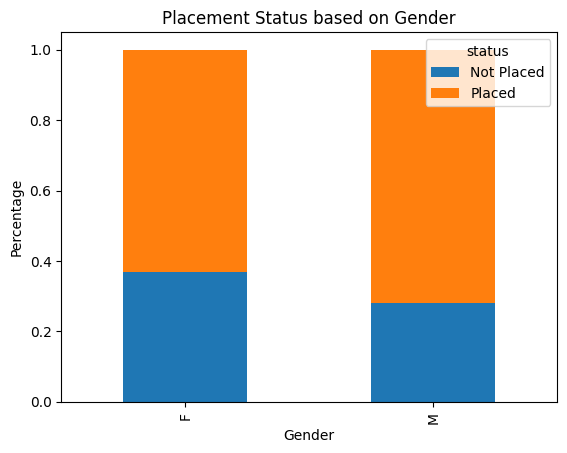

In [18]:
# Plot bar chart for gender and placement status
gender_placement.plot(kind='bar', stacked=True)
plt.title("Placement Status based on Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()


In [19]:
# Distribution of placement status based on specialisation
specialisation_placement = df.groupby('specialisation')['status'].value_counts(normalize=True).unstack()
print("Distribution of Placement Status based on Specialisation:")
print(specialisation_placement)

Distribution of Placement Status based on Specialisation:
status          Not Placed    Placed
specialisation                      
Mkt&Fin           0.208333  0.791667
Mkt&HR            0.442105  0.557895


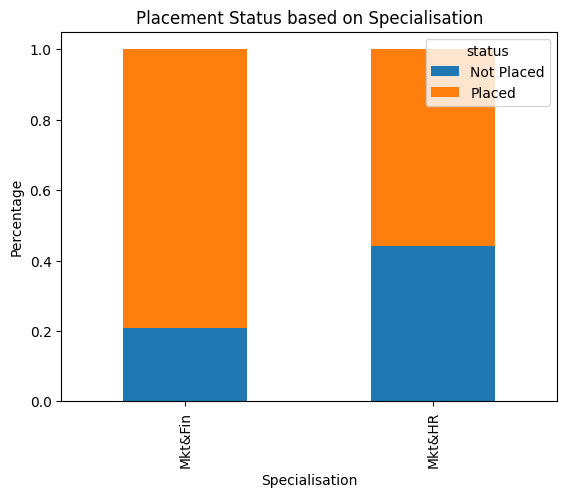

In [20]:
# Plot bar chart for specialisation and placement status
specialisation_placement.plot(kind='bar', stacked=True)
plt.title("Placement Status based on Specialisation")
plt.xlabel("Specialisation")
plt.ylabel("Percentage")
plt.show()

Q3.How does the distribution of secondary and higher secondary school percentages vary among the placed and not-placed students? Can you identify any significant differences or patterns?

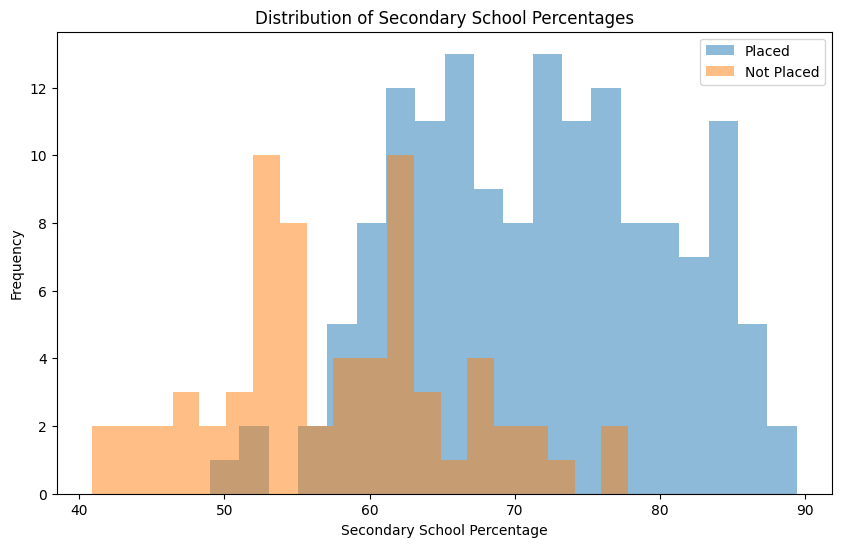

In [23]:
# Distribution of secondary school percentages among placed and not-placed students
plt.figure(figsize=(10, 6))
plt.hist(df[df['status'] == 'Placed']['ssc_p'], bins=20, alpha=0.5, label='Placed')
plt.hist(df[df['status'] == 'Not Placed']['ssc_p'], bins=20, alpha=0.5, label='Not Placed')
plt.title("Distribution of Secondary School Percentages")
plt.xlabel("Secondary School Percentage")
plt.ylabel("Frequency")
plt.legend()
plt.show()

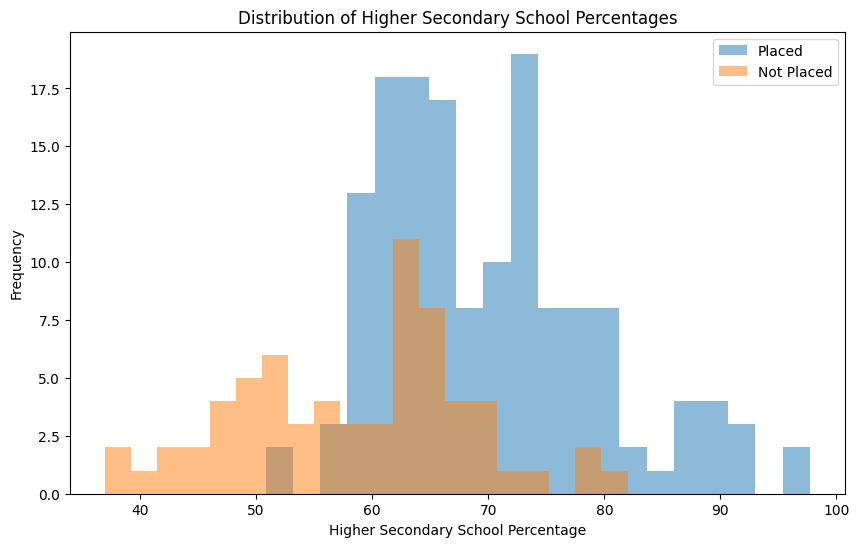

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['status'] == 'Placed']['hsc_p'], bins=20, alpha=0.5, label='Placed')
plt.hist(df[df['status'] == 'Not Placed']['hsc_p'], bins=20, alpha=0.5, label='Not Placed')
plt.title("Distribution of Higher Secondary School Percentages")
plt.xlabel("Higher Secondary School Percentage")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Q4.What is the distribution of the salary offers for placed students? What are the minimum, maximum, mean, and median salary values? Are there any notable patterns or outliers in the data? 

In [25]:
# Filter data for placed students
placed_students = df[df['status'] == 'Placed']

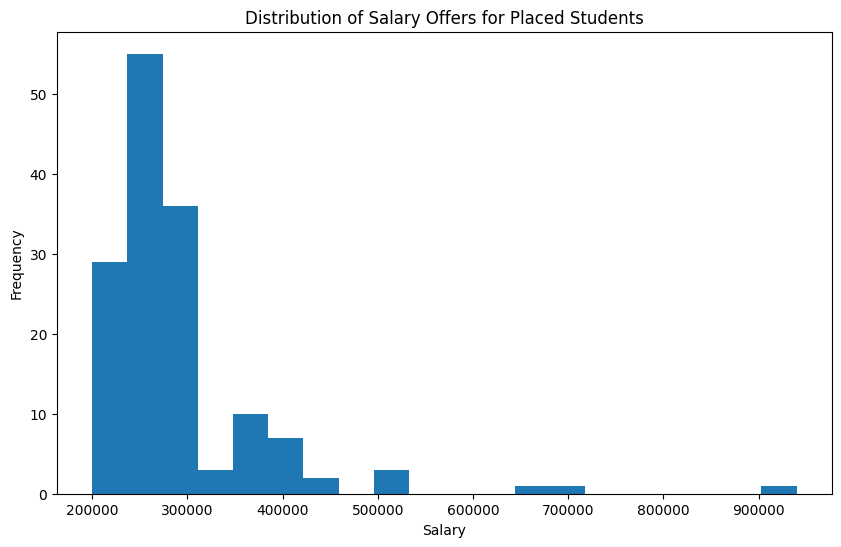

In [26]:
# Distribution of salary offers for placed students
plt.figure(figsize=(10, 6))
plt.hist(placed_students['salary'], bins=20)
plt.title("Distribution of Salary Offers for Placed Students")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

In [27]:
# Minimum, maximum, mean, and median salary values
min_salary = placed_students['salary'].min()
max_salary = placed_students['salary'].max()
mean_salary = placed_students['salary'].mean()
median_salary = placed_students['salary'].median()

print("Minimum Salary:", min_salary)
print("Maximum Salary:", max_salary)
print("Mean Salary:", mean_salary)
print("Median Salary:", median_salary)

Minimum Salary: 200000.0
Maximum Salary: 940000.0
Mean Salary: 288655.4054054054
Median Salary: 265000.0


Q5.How can we preprocess and normalize the data? How data normalization will help you in model training and prediction? 

In [28]:
# Handling missing values
df.fillna(0, inplace=True)  # Replace missing values with 0 or appropriate imputation method


In [42]:
import sklearn

In [43]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [44]:
# Encoding categorical variables
categorical_cols = ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation"]
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [45]:
# Normalizing numerical variables
numerical_cols = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p"]
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [46]:
# Preview the preprocessed and normalized data
print(df.head())


   sl_no  gender     ssc_p  ssc_b     hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0      1       1  0.538240      1  0.889621      1      1  0.195122         2   
1      2       1  0.792414      0  0.680890      1      2  0.670244         2   
2      3       1  0.497011      0  0.510708      0      0  0.341463         0   
3      4       1  0.311482      0  0.247117      0      2  0.048780         2   
4      5       1  0.925788      0  0.602965      0      1  0.568293         0   

   workex   etest_p  specialisation     mba_p      status    salary  
0       0  0.104167               1  0.284483      Placed  270000.0  
1       1  0.760417               0  0.564843      Placed  200000.0  
2       0  0.520833               0  0.247001      Placed  250000.0  
3       0  0.333333               1  0.308096  Not Placed       0.0  
4       0  0.975000               0  0.160795      Placed  425000.0  
